In [1]:
import sys
sys.path.append(r'C:\Users\Zeina\House_Pricing\src' )

from preprocessing import HousePricePreprocessor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ All imports successful!")

✅ All imports successful!


In [2]:
preprocessor = HousePricePreprocessor(artifacts_path='../data/artifacts/')

print("✅ HousePricePreprocessor initialized")
print(f"📁 Artifacts will be saved to: ../data/artifacts/")

✅ HousePricePreprocessor initialized
📁 Artifacts will be saved to: ../data/artifacts/


In [3]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

print(f"\n📊 Training Data:")
print(f"   Shape: {train_df.shape}")
print(f"   Rows: {train_df.shape[0]:,}")
print(f"   Columns: {train_df.shape[1]}")

print(f"\n📊 Test Data:")
print(f"   Shape: {test_df.shape}")
print(f"   Rows: {test_df.shape[0]:,}")
print(f"   Columns: {test_df.shape[1]}")

print(f"\n🎯 Target Variable (SalePrice) Statistics:")
print(train_df['SalePrice'].describe())

# Quick data preview
print("\n📋 Training Data Preview:")
display(train_df.head())

print("\n📋 Test Data Preview:")
display(test_df.head())


📊 Training Data:
   Shape: (1460, 81)
   Rows: 1,460
   Columns: 81

📊 Test Data:
   Shape: (1459, 80)
   Rows: 1,459
   Columns: 80

🎯 Target Variable (SalePrice) Statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

📋 Training Data Preview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



📋 Test Data Preview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
print("\n📌 Data Types Distribution (Training):")
print(train_df.dtypes.value_counts())

# Check missing values
print("\n📌 Top 10 Features with Missing Values (Training):")
missing_train = train_df.isnull().sum()
missing_train_pct = (missing_train / len(train_df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_train,
    'Missing_Percentage': missing_train_pct
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
)
print(missing_summary.head(10))

# Check for duplicates
print(f"\n📌 Duplicate Rows:")
print(f"   Training: {train_df.duplicated().sum()}")
print(f"   Test: {test_df.duplicated().sum()}")



📌 Data Types Distribution (Training):
object     43
int64      35
float64     3
Name: count, dtype: int64

📌 Top 10 Features with Missing Values (Training):
              Missing_Count  Missing_Percentage
PoolQC                 1453           99.520548
MiscFeature            1406           96.301370
Alley                  1369           93.767123
Fence                  1179           80.753425
MasVnrType              872           59.726027
FireplaceQu             690           47.260274
LotFrontage             259           17.739726
GarageType               81            5.547945
GarageYrBlt              81            5.547945
GarageFinish             81            5.547945

📌 Duplicate Rows:
   Training: 0
   Test: 0


In [5]:
train_processed, pca_results = preprocessor.preprocess_pipeline(
    train_df, 
    is_train=True,          
    apply_pca_flag=True     
)

print("\n" + "=" * 80)
print("TRAINING DATA PREPROCESSING COMPLETE!")
print("=" * 80)
print(f"✅ Original shape: {train_df.shape}")
print(f"✅ Processed shape: {train_processed.shape}")
print(f"✅ Features created: {train_processed.shape[1] - train_df.shape[1]}")



TRAINING DATA PREPROCESSING PIPELINE
Initial shape: (1460, 81)

DATA TYPE OPTIMIZATION
✓ MSSubClass          : int64      → str
✓ MoSold              : int64      → str
✓ OverallQual         : int64      → int8
✓ OverallCond         : int64      → int8
✓ YearBuilt           : int64      → int16
✓ YearRemodAdd        : int64      → int16
✓ GarageYrBlt         : float64    → float32
✓ YrSold              : int64      → int16
✓ BsmtFullBath        : int64      → int8
✓ BsmtHalfBath        : int64      → int8
✓ FullBath            : int64      → int8
✓ HalfBath            : int64      → int8
✓ BedroomAbvGr        : int64      → int8
✓ KitchenAbvGr        : int64      → int8
✓ TotRmsAbvGrd        : int64      → int8
✓ Fireplaces          : int64      → int8
✓ GarageCars          : int64      → float32
✓ LotFrontage         : float64    → float32
✓ LotArea             : int64      → float32
✓ MasVnrArea          : float64    → float32
✓ BsmtFinSF1          : int64      → float32
✓ BsmtFinSF

In [6]:
print("\n1️⃣ Missing Values Check:")
remaining_missing = train_processed.isnull().sum().sum()
print(f"   Total missing values: {remaining_missing}")

if remaining_missing > 0:
    print("\n   Columns with missing values:")
    print(train_processed.isnull().sum()[train_processed.isnull().sum() > 0])

print("\n2️⃣ Infinite Values Check:")
inf_count = np.isinf(train_processed.select_dtypes(include=[np.number])).sum().sum()
print(f"   Total infinite values: {inf_count}")

print("\n3️⃣ Data Types:")
print(train_processed.dtypes.value_counts())

print("\n4️⃣ Feature Names (first 20):")
feature_cols = [col for col in train_processed.columns if col not in ['Id', 'SalePrice']]
print(f"   Total features: {len(feature_cols)}")
print(f"   Sample features: {feature_cols[:20]}")

# Preview processed data
print("\n📋 Processed Data Preview:")
display(train_processed.head())


1️⃣ Missing Values Check:
   Total missing values: 0

2️⃣ Infinite Values Check:
   Total infinite values: 0

3️⃣ Data Types:
bool       168
float64     63
int64        2
Name: count, dtype: int64

4️⃣ Feature Names (first 20):
   Total features: 231
   Sample features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF']

📋 Processed Data Preview:


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SalePrice,Is_Gtl,Is_CompShg,Is_GasA,TotalSF,TotalBath,HouseAge,RemodAge,TotalPorchSF,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,OverallQualCond,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,-0.210526,-0.254076,0.5,0.0,0.652174,0.243243,1.034410,1.0,0.0,0.0,0.0,0.0,0.4,0.452790,0.0,0.0,-0.898158,-0.269652,0.0,-0.453608,1.024186,0.0,0.380070,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-1.0,-0.50,0.589744,0.0,0.0,0.281573,0.0,0.0,0.000000,0.205247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208500,0.0,0.0,0.0,0.092509,2.5,-0.652174,-0.243243,0.047828,0.0,1.0,0.0,0.0,-1.0,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,F

In [7]:
import os

# Create processed directory if it doesn't exist
os.makedirs('../data/processed', exist_ok=True)

# Save main processed training data
train_processed.to_csv('../data/processed/train_processed.csv', index=False)
print("✅ Saved: ../data/processed/train_processed.csv")
print(f"   Shape: {train_processed.shape}")
print(f"   Size: {os.path.getsize('../data/processed/train_processed.csv') / 1024 / 1024:.2f} MB")

# Save PCA versions if they were created
if pca_results:
    print("\n📊 Saving PCA Versions:")
    print("=" * 60)
    
    for version_name, pca_df in pca_results.items():
        filename = f'../data/processed/train_pca_{version_name}.csv'
        pca_df.to_csv(filename, index=False)
        
        n_components = pca_df.shape[1] - 2  # Exclude Id and SalePrice
        file_size = os.path.getsize(filename) / 1024 / 1024
        
        print(f"✅ Saved: train_pca_{version_name}.csv")
        print(f"   Components: {n_components}")
        print(f"   Shape: {pca_df.shape}")
        print(f"   Size: {file_size:.2f} MB")
        print()
else:
    print("\n⚠️  No PCA versions created (apply_pca_flag was False)")

✅ Saved: ../data/processed/train_processed.csv
   Shape: (1460, 233)
   Size: 2.12 MB

📊 Saving PCA Versions:
✅ Saved: train_pca_variance_95.csv
   Components: 71
   Shape: (1460, 73)
   Size: 2.00 MB

✅ Saved: train_pca_variance_99.csv
   Components: 118
   Shape: (1460, 120)
   Size: 3.34 MB

✅ Saved: train_pca_n_components_50.csv
   Components: 50
   Shape: (1460, 52)
   Size: 1.40 MB

✅ Saved: train_pca_n_components_100.csv
   Components: 100
   Shape: (1460, 102)
   Size: 2.82 MB

✅ Saved: train_pca_n_components_150.csv
   Components: 150
   Shape: (1460, 152)
   Size: 4.27 MB




📊 Generating Preprocessing Visualizations...


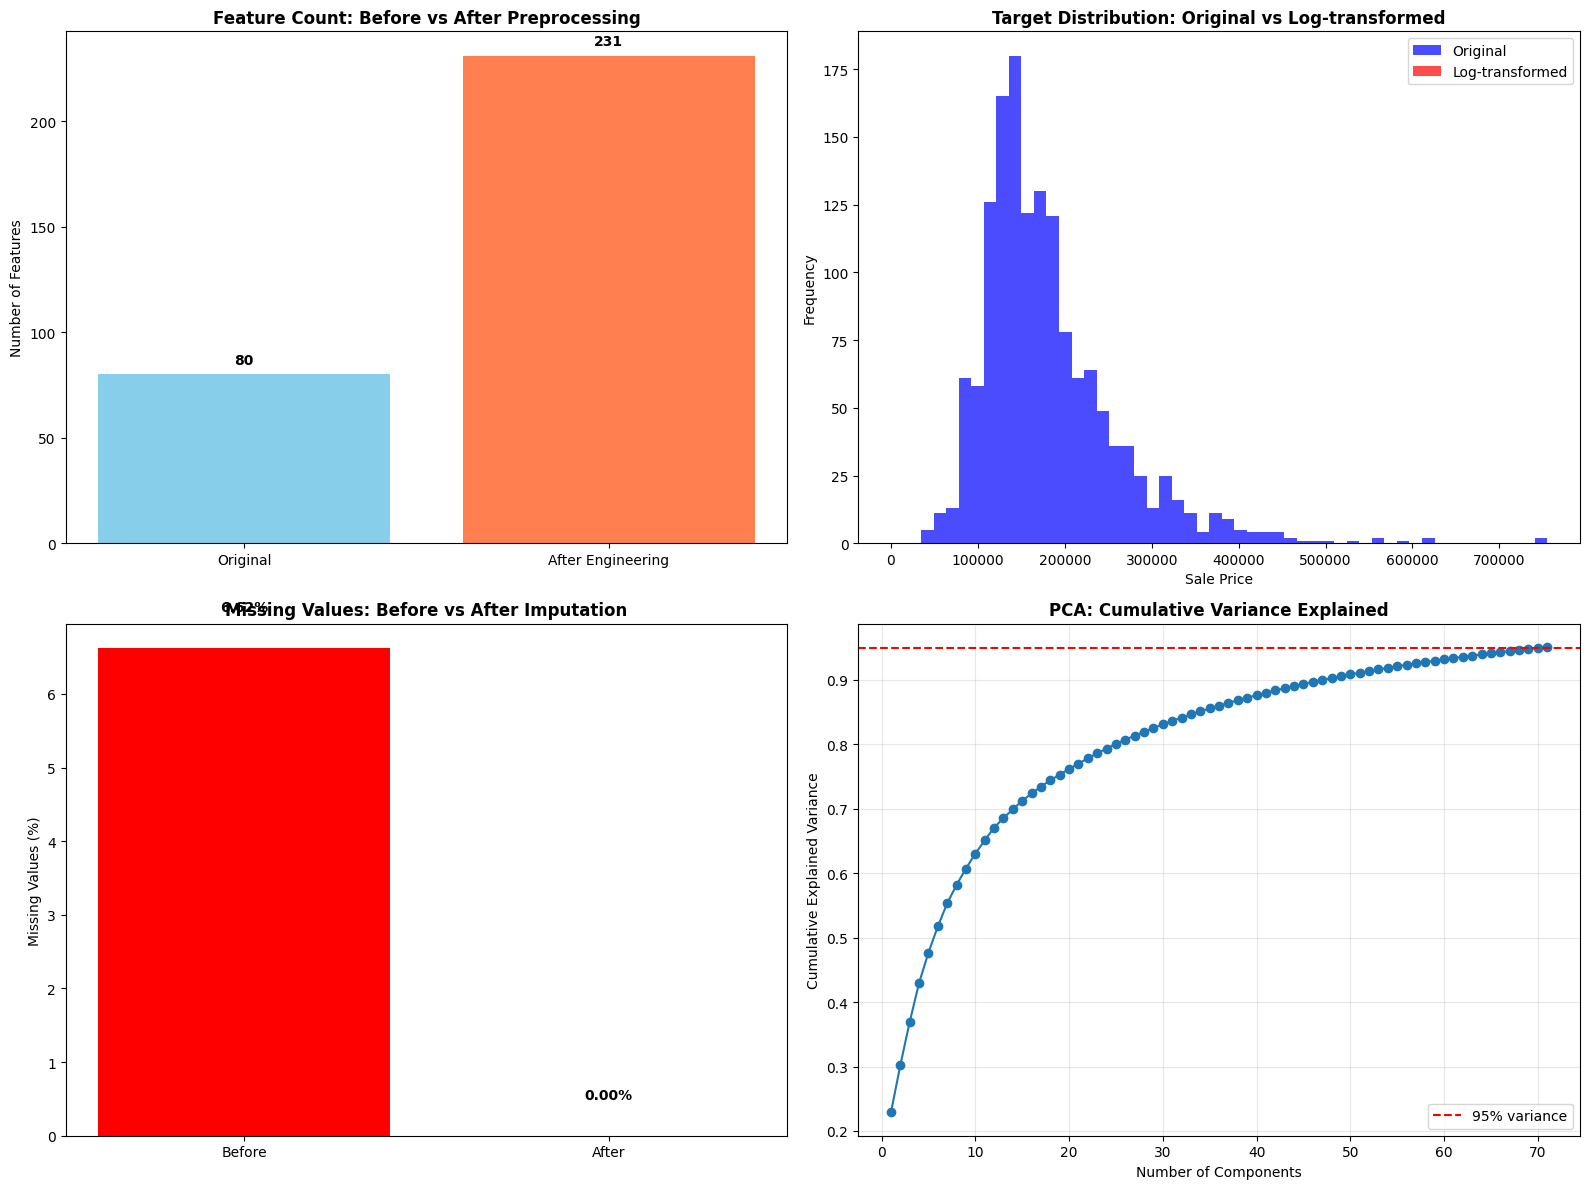

✅ Visualization saved: ../images/preprocessing_summary.png


<Figure size 640x480 with 0 Axes>

In [8]:
print("\n📊 Generating Preprocessing Visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Feature count comparison
ax1 = axes[0, 0]
feature_counts = {
    'Original': train_df.shape[1] - 1,  # Exclude Id
    'After Engineering': train_processed.shape[1] - 2,  # Exclude Id, SalePrice
}
ax1.bar(feature_counts.keys(), feature_counts.values(), color=['skyblue', 'coral'])
ax1.set_ylabel('Number of Features')
ax1.set_title('Feature Count: Before vs After Preprocessing', fontweight='bold')
for i, (k, v) in enumerate(feature_counts.items()):
    ax1.text(i, v + 5, str(v), ha='center', fontweight='bold')

# 2. Target distribution (original vs log-transformed)
ax2 = axes[0, 1]
ax2.hist(train_df['SalePrice'], bins=50, alpha=0.7, label='Original', color='blue')
ax2.hist(np.log1p(train_df['SalePrice']), bins=50, alpha=0.7, label='Log-transformed', color='red')
ax2.set_xlabel('Sale Price')
ax2.set_ylabel('Frequency')
ax2.set_title('Target Distribution: Original vs Log-transformed', fontweight='bold')
ax2.legend()

# 3. Missing values before and after
ax3 = axes[1, 0]
missing_before = (train_df.isnull().sum().sum() / train_df.size) * 100
missing_after = (train_processed.isnull().sum().sum() / train_processed.size) * 100
ax3.bar(['Before', 'After'], [missing_before, missing_after], color=['red', 'green'])
ax3.set_ylabel('Missing Values (%)')
ax3.set_title('Missing Values: Before vs After Imputation', fontweight='bold')
ax3.text(0, missing_before + 0.5, f'{missing_before:.2f}%', ha='center', fontweight='bold')
ax3.text(1, missing_after + 0.5, f'{missing_after:.2f}%', ha='center', fontweight='bold')

# 4. PCA variance explained (if available)
ax4 = axes[1, 1]
if pca_results and 'variance_95' in pca_results:
    # Show cumulative variance explained for variance_95 version
    from sklearn.decomposition import PCA
    
    # Get the PCA model
    if hasattr(preprocessor, 'pca_models') and 'variance_95' in preprocessor.pca_models:
        pca_model = preprocessor.pca_models['variance_95']
        cumsum_variance = np.cumsum(pca_model.explained_variance_ratio_)
        
        ax4.plot(range(1, len(cumsum_variance) + 1), cumsum_variance, marker='o')
        ax4.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
        ax4.set_xlabel('Number of Components')
        ax4.set_ylabel('Cumulative Explained Variance')
        ax4.set_title('PCA: Cumulative Variance Explained', fontweight='bold')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'PCA models not available', 
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('PCA Analysis')
else:
    ax4.text(0.5, 0.5, 'No PCA applied\n(Set apply_pca_flag=True)', 
            ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('PCA Analysis')

plt.tight_layout()
plt.show()

# Save visualization
os.makedirs('../images', exist_ok=True)
plt.savefig('../images/preprocessing_summary.png', dpi=300, bbox_inches='tight')
print("✅ Visualization saved: ../images/preprocessing_summary.png")
#plt.show()

In [9]:
print("STARTING TEST DATA PREPROCESSING")

# IMPORTANT: Load artifacts first (uses statistics from training)
preprocessor.load_artifacts()

# Process test data
test_processed, _ = preprocessor.preprocess_pipeline(
    test_df,
    is_train=False,       # Important: Uses saved statistics, doesn't create new ones
    apply_pca_flag=False  # Don't need PCA for test data
)


print(f"✅ Original shape: {test_df.shape}")
print(f"✅ Processed shape: {test_processed.shape}")


STARTING TEST DATA PREPROCESSING

LOADING ARTIFACTS
✓ Loaded statistics
✓ Loaded scaler
✓ Loaded PCA models

TEST DATA PREPROCESSING PIPELINE
Initial shape: (1459, 80)

DATA TYPE OPTIMIZATION
✓ MSSubClass          : int64      → str
✓ MoSold              : int64      → str
✓ OverallQual         : int64      → int8
✓ OverallCond         : int64      → int8
✓ YearBuilt           : int64      → int16
✓ YearRemodAdd        : int64      → int16
✓ GarageYrBlt         : float64    → float32
✓ YrSold              : int64      → int16
⚠️  Could not convert BsmtFullBath: Cannot convert non-finite values (NA or inf) to integer
⚠️  Could not convert BsmtHalfBath: Cannot convert non-finite values (NA or inf) to integer
✓ FullBath            : int64      → int8
✓ HalfBath            : int64      → int8
✓ BedroomAbvGr        : int64      → int8
✓ KitchenAbvGr        : int64      → int8
✓ TotRmsAbvGrd        : int64      → int8
✓ Fireplaces          : int64      → int8
✓ GarageCars          : float64 

In [10]:
print("VERIFYING TRAIN/TEST ALIGNMENT")

# Get feature columns (excluding Id and SalePrice)
train_features = [col for col in train_processed.columns if col not in ['Id', 'SalePrice']]
test_features = [col for col in test_processed.columns if col != 'Id']

print(f"\n1️⃣ Feature Count:")
print(f"   Training features: {len(train_features)}")
print(f"   Test features: {len(test_features)}")

# Check if columns match
if len(train_features) == len(test_features):
    print(f"   ✅ Feature counts match!")
else:
    print(f"   ⚠️  Feature counts don't match!")

print(f"\n2️⃣ Column Name Alignment:")
missing_in_test = set(train_features) - set(test_features)
extra_in_test = set(test_features) - set(train_features)

if len(missing_in_test) == 0 and len(extra_in_test) == 0:
    print(f"   ✅ All columns aligned perfectly!")
else:
    if missing_in_test:
        print(f"   ⚠️  Columns in train but not in test: {missing_in_test}")
    if extra_in_test:
        print(f"   ⚠️  Columns in test but not in train: {extra_in_test}")

print(f"\n3️⃣ Data Quality Check:")
print(f"   Test missing values: {test_processed.isnull().sum().sum()}")
print(f"   Test infinite values: {np.isinf(test_processed.select_dtypes(include=[np.number])).sum().sum()}")

# If there are missing or extra columns, we need to align them
if len(missing_in_test) > 0 or len(extra_in_test) > 0:
    print("\n⚠️  Aligning test features with training features...")
    
    # Add missing columns with zeros
    for col in missing_in_test:
        test_processed[col] = 0
        print(f"   Added missing column: {col}")
    
    # Remove extra columns
    for col in extra_in_test:
        if col != 'Id':  # Don't remove Id column
            test_processed = test_processed.drop(col, axis=1)
            print(f"   Removed extra column: {col}")
    
    # Reorder columns to match training
    test_cols_ordered = ['Id'] + train_features
    test_processed = test_processed[test_cols_ordered]
    
    print(f"\n   ✅ Test data aligned! New shape: {test_processed.shape}")


VERIFYING TRAIN/TEST ALIGNMENT

1️⃣ Feature Count:
   Training features: 231
   Test features: 228
   ⚠️  Feature counts don't match!

2️⃣ Column Name Alignment:
   ⚠️  Columns in train but not in test: {'Condition2_RRAn', 'HouseStyle_2.5Fin', 'MiscFeature_TenC', 'Condition2_RRNn', 'Exterior1st_Stone', 'Electrical_Mix', 'Condition2_RRAe', 'Exterior1st_ImStucc', 'Exterior2nd_Other'}
   ⚠️  Columns in test but not in train: {'Functional_Unknown', 'MSZoning_Unknown', 'SaleType_Unknown', 'Exterior1st_Unknown', 'MSSubClass_150', 'Exterior2nd_Unknown'}

3️⃣ Data Quality Check:
   Test missing values: 1
   Test infinite values: 0

⚠️  Aligning test features with training features...
   Added missing column: Condition2_RRAn
   Added missing column: HouseStyle_2.5Fin
   Added missing column: MiscFeature_TenC
   Added missing column: Condition2_RRNn
   Added missing column: Exterior1st_Stone
   Added missing column: Electrical_Mix
   Added missing column: Condition2_RRAe
   Added missing column:

In [11]:
missing_cols = test_processed.columns[test_processed.isnull().any()].tolist()

if missing_cols:
    print(f"   Columns with missing values: {missing_cols}")
    
    for col in missing_cols:
        missing_count = test_processed[col].isnull().sum()
        print(f"   - {col}: {missing_count} missing")
        
        # Fill with appropriate value
        if test_processed[col].dtype in ['float64', 'float32', 'int64', 'int32', 'int8', 'int16']:
            # Numeric: fill with 0
            test_processed[col].fillna(0, inplace=True)
            print(f"     ✅ Filled with 0")
        else:
            # Categorical: fill with mode or 'Unknown'
            if test_processed[col].mode().size > 0:
                mode_val = test_processed[col].mode()[0]
                test_processed[col].fillna(mode_val, inplace=True)
                print(f"     ✅ Filled with mode: {mode_val}")
            else:
                test_processed[col].fillna('Unknown', inplace=True)
                print(f"     ✅ Filled with 'Unknown'")
else:
    print("   ✅ No missing values found!")

print("\n   Checking for infinite values...")
numeric_cols = test_processed.select_dtypes(include=[np.number]).columns
inf_found = False

for col in numeric_cols:
    inf_count = np.isinf(test_processed[col]).sum()
    if inf_count > 0:
        inf_found = True
        print(f"   - {col}: {inf_count} infinite values")
        
        # Replace inf with large finite number or 0
        test_processed[col].replace([np.inf, -np.inf], 0, inplace=True)
        print(f"     ✅ Replaced with 0")

if not inf_found:
    print("   ✅ No infinite values found!")


print("\n Final Data Quality Check:")
issues_found = False

# Missing values
missing_total = test_processed.isnull().sum().sum()
print(f"   Missing values: {missing_total}")
if missing_total > 0:
    issues_found = True
    print("   ⚠️  Still has missing values!")

# Infinite values
inf_total = np.isinf(test_processed.select_dtypes(include=[np.number])).sum().sum()
print(f"   Infinite values: {inf_total}")
if inf_total > 0:
    issues_found = True
    print("   ⚠️  Still has infinite values!")

# NaN values (different from missing)
nan_total = test_processed.isna().sum().sum()
print(f"   NaN values: {nan_total}")

# Data types
numeric_count = len(test_processed.select_dtypes(include=[np.number]).columns)
print(f"   Numeric columns: {numeric_count}")

if not issues_found:
    print("\n   ✅ All data quality checks passed!")

print("\n Final Shape Verification:")
train_features = [col for col in train_processed.columns if col not in ['Id', 'SalePrice']]
test_features = [col for col in test_processed.columns if col != 'Id']

print(f"   Training shape: {train_processed.shape}")
print(f"   Test shape: {test_processed.shape}")
print(f"   Training features: {len(train_features)}")
print(f"   Test features: {len(test_features)}")

if len(train_features) == len(test_features):
    print("\n   ✅ Feature counts match perfectly!")
    
    # Check if all column names match
    if set(train_features) == set(test_features):
        print("   ✅ All feature names match!")
    else:
        print("   ⚠️  Feature names don't match exactly")
        
        # Show differences
        missing = set(train_features) - set(test_features)
        extra = set(test_features) - set(train_features)
        
        if missing:
            print(f"      Missing in test: {missing}")
        if extra:
            print(f"      Extra in test: {extra}")
else:
    print(f"\n   ⚠️  Feature count mismatch!")
    print(f"      Difference: {abs(len(train_features) - len(test_features))} features")

print("\n Sample Data Preview:")


print("\nFirst 3 rows of test data:")
display(test_processed.head(3))

print("\nData types summary:")
print(test_processed.dtypes.value_counts())

print("\nBasic statistics (first 5 numeric columns):")
numeric_cols_sample = test_processed.select_dtypes(include=[np.number]).columns[:5]
display(test_processed[numeric_cols_sample].describe())


   Columns with missing values: ['KitchenQual']
   - KitchenQual: 1 missing
     ✅ Filled with 0

   Checking for infinite values...
   ✅ No infinite values found!

 Final Data Quality Check:
   Missing values: 0
   Infinite values: 0
   NaN values: 0
   Numeric columns: 73

   ✅ All data quality checks passed!

 Final Shape Verification:
   Training shape: (1460, 233)
   Test shape: (1459, 232)
   Training features: 231
   Test features: 231

   ✅ Feature counts match perfectly!
   ✅ All feature names match!

 Sample Data Preview:

First 3 rows of test data:


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,Is_Gtl,Is_CompShg,Is_GasA,TotalSF,TotalBath,HouseAge,RemodAge,TotalPorchSF,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,OverallQualCond,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,0.578947,0.529521,-0.5,1.0,-0.260870,-0.891892,0.000000,0.0,0.0,-1.0,0.0,0.0,-0.2,0.118638,1.0,0.0,-0.442730,-0.217910,-1.0,-0.375061,0.000000,0.0,-0.877559,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-0.5,-1.0,-0.50,-0.487179,-1.0,-1.0,1.035197,0.0,0.0,0.964690,-0.769489,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,-0.699849,-1.5,0.304348,0.945946,0.183735,0.0,0.0,0.0,0.0,-1.0,-0.5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,Fa


Data types summary:
bool       159
float64     63
int64       10
Name: count, dtype: int64

Basic statistics (first 5 numeric columns):


,Id,LotFrontage,LotArea,OverallQual,OverallCond
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,-0.036813,0.005978,0.040096,0.533585
std,421.321334,0.923877,0.894852,0.716216,0.943302
min,1461.000000,-1.973684,-1.975543,-2.000000,-1.500000
25%,1825.500000,-0.473684,-0.515687,-0.500000,0.000000
50%,2190.000000,0.000000,-0.019639,0.000000,0.000000
75%,2554.500000,0.473684,0.503706,0.500000,1.000000
max,2919.000000,2.026316,2.024457,2.000000,2.500000


In [12]:
# Save processed test data
test_processed.to_csv('../data/processed/test_processed.csv', index=False)
print("\n✅ Saved: ../data/processed/test_processed.csv")
print(f"   Shape: {test_processed.shape}")
print(f"   Size: {os.path.getsize('../data/processed/test_processed.csv') / 1024 / 1024:.2f} MB")

# Preview processed test data
print("\n📋 Processed Test Data Preview:")
display(test_processed.head())



✅ Saved: ../data/processed/test_processed.csv
   Shape: (1459, 232)
   Size: 2.06 MB

📋 Processed Test Data Preview:


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,Is_Gtl,Is_CompShg,Is_GasA,TotalSF,TotalBath,HouseAge,RemodAge,TotalPorchSF,HasPool,Has2ndFloor,HasGarage,HasBsmt,HasFireplace,OverallQualCond,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,PavedDrive_P,PavedDrive_Y,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,0.578947,0.529521,-0.5,1.0,-0.260870,-0.891892,0.000000,0.0,0.0,-1.0,0.0,0.0,-0.2,0.118638,1.0,0.0,-0.442730,-0.217910,-1.0,-0.375061,0.000000,0.0,-0.877559,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,-0.5,-1.0,-0.50,-0.487179,-1.0,-1.0,1.035197,0.0,0.0,0.964690,-0.769489,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,-0.699849,-1.5,0.304348,0.945946,0.183735,0.0,0.0,0.0,0.0,-1.0,-0.5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,Fa

In [13]:
print("🎉 PREPROCESSING PIPELINE COMPLETE!")
print("\n📁 FILES CREATED:")
print("=" * 80)

files_created = [
    "../data/processed/train_processed.csv",
    "../data/processed/test_processed.csv",
    "../data/artifacts/statistics.pkl",
    "../data/artifacts/scaler.pkl",
    "../data/artifacts/pca_models.pkl",
    "../images/preprocessing_summary.png"
]

if pca_results:
    for version_name in pca_results.keys():
        files_created.append(f"../data/processed/train_pca_{version_name}.csv")

for i, file in enumerate(files_created, 1):
    if os.path.exists(file):
        size = os.path.getsize(file) / 1024
        if size > 1024:
            print(f"{i}. ✅ {file} ({size/1024:.2f} MB)")
        else:
            print(f"{i}. ✅ {file} ({size:.2f} KB)")
    else:
        print(f"{i}. ⚠️  {file} (not found)")

print("\n📊 DATA SUMMARY:")
print("=" * 80)
print(f"Training samples: {len(train_processed):,}")
print(f"Test samples: {len(test_processed):,}")
print(f"Features: {len(train_features)}")
print(f"Target variable: SalePrice (log-transformed)")

if pca_results:
    print(f"\nPCA Versions Created: {len(pca_results)}")
    for version_name, pca_df in pca_results.items():
        n_components = pca_df.shape[1] - 2
        print(f"  - {version_name}: {n_components} components")

print("\n🚀 NEXT STEPS:")
print("=" * 80)
print("1. Open: notebooks/03_modeling_comprehensive.ipynb")
print("2. Train models on: data/processed/train_processed.csv")
print("3. Compare PCA versions if needed")
print("4. Generate predictions on: data/processed/test_processed.csv")
print("5. Create Streamlit app for deployment")

print("\n✅ Ready for modeling!")

🎉 PREPROCESSING PIPELINE COMPLETE!

📁 FILES CREATED:
1. ✅ ../data/processed/train_processed.csv (2.12 MB)
2. ✅ ../data/processed/test_processed.csv (2.06 MB)
3. ✅ ../data/artifacts/statistics.pkl (5.25 KB)
4. ✅ ../data/artifacts/scaler.pkl (2.24 KB)
5. ✅ ../data/artifacts/pca_models.pkl (909.17 KB)
6. ✅ ../images/preprocessing_summary.png (14.78 KB)
7. ✅ ../data/processed/train_pca_variance_95.csv (2.00 MB)
8. ✅ ../data/processed/train_pca_variance_99.csv (3.34 MB)
9. ✅ ../data/processed/train_pca_n_components_50.csv (1.40 MB)
10. ✅ ../data/processed/train_pca_n_components_100.csv (2.82 MB)
11. ✅ ../data/processed/train_pca_n_components_150.csv (4.27 MB)

📊 DATA SUMMARY:
Training samples: 1,460
Test samples: 1,459
Features: 231
Target variable: SalePrice (log-transformed)

PCA Versions Created: 5
  - variance_95: 71 components
  - variance_99: 118 components
  - n_components_50: 50 components
  - n_components_100: 100 components
  - n_components_150: 150 components

🚀 NEXT STEPS:
1. Op